# Amazing ML journey with Stan    
Welcome! Let me show you around on this amazing experience.   
FOR THE LOVE OF GOD DO NOT JUST RUN THE WHOLE THING!    


## 1. Data processing

#### The path    
First, make sure that you have created a .py file containing variable AUDIO_DATA_PATH with the path to the audio data, pointing to AUDIO.

In [1]:
import paths
# Create a .py file containing variable AUDIO_DATA_PATH with the path to the audio data, pointing to AUDIO
AUDIO_DATA_PATH = paths.AUDIO_DATA_PATH
print(AUDIO_DATA_PATH)
# The structure of the data folder should be as follows:

#         ↓   The path should be pointing to this folder
# data/AUDIO/
#           FAKE
#           REAL

data/AUDIO


### Imports

In [2]:
# Imports go brrrrrr
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import wave
import cv2
import matplotlib.pyplot as plt
import sklearn
import scipy.io.wavfile as wav

from keras import layers
from keras import models
from IPython import display
from pydub import AudioSegment

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split


c:\Users\wasil\anaconda3\envs\ml01\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


## 2. Obama Training

### Splitting data into train, test, and validation sets

In [3]:
image_size = (128, 128)
validation_split = 0.2
seed_train_validation = 3
shuffle_value = True

train_ds_obama = tf.keras.utils.image_dataset_from_directory(
    directory='data/SEPARATED/IMAGES/OBAMA/TRAINING',
    image_size=image_size,
    validation_split=validation_split,
    subset="training",
    seed=seed_train_validation,
    color_mode='grayscale', # normal matrix multiplication is hard enough
    shuffle=shuffle_value
)

val_ds_obama = tf.keras.utils.image_dataset_from_directory(
    directory='data/SEPARATED/IMAGES/OBAMA/TRAINING',
    image_size=image_size,
    validation_split=validation_split,
    subset="validation",
    seed=seed_train_validation,
    color_mode='grayscale',
    shuffle=shuffle_value
)


test_ds_obama = tf.keras.utils.image_dataset_from_directory(
    directory='data/SEPARATED/IMAGES/OBAMA/TEST',
    image_size=image_size,
    validation_split=0.99,
    subset="validation",
    seed=seed_train_validation,
    color_mode='grayscale',
    shuffle=shuffle_value
)

# number of batches in the validation set
val_batches_obama = tf.data.experimental.cardinality(val_ds_obama)



Found 3744 files belonging to 2 classes.
Using 2996 files for training.
Found 3744 files belonging to 2 classes.
Using 748 files for validation.
Found 392 files belonging to 2 classes.
Using 388 files for validation.


In [4]:
train_ds_taylor = tf.keras.utils.image_dataset_from_directory(
    directory='data/SEPARATED/IMAGES/TAYLOR/TRAINING',
    image_size=image_size,
    validation_split=validation_split,
    subset="training",
    seed=seed_train_validation,
    color_mode='grayscale', # normal matrix multiplication is hard enough
    shuffle=shuffle_value
)

val_ds_taylor = tf.keras.utils.image_dataset_from_directory(
    directory='data/SEPARATED/IMAGES/TAYLOR/TRAINING',
    image_size=image_size,
    validation_split=validation_split,
    subset="validation",
    seed=seed_train_validation,
    color_mode='grayscale',
    shuffle=shuffle_value
)


test_ds_taylor = tf.keras.utils.image_dataset_from_directory(
    directory='data/SEPARATED/IMAGES/TAYLOR/TEST',
    image_size=image_size,
    validation_split=0.99,
    subset="validation",
    seed=seed_train_validation,
    color_mode='grayscale',
    shuffle=shuffle_value
)

# number of batches in the validation set
val_batches_taylor = tf.data.experimental.cardinality(val_ds_taylor)

Found 4039 files belonging to 2 classes.
Using 3232 files for training.
Found 4039 files belonging to 2 classes.
Using 807 files for validation.
Found 517 files belonging to 2 classes.
Using 511 files for validation.


## Construct the model



In [5]:

model_obama = models.Sequential([
    # CNN

    # 32 filters with 3x3 kernels
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 1)),
    # 2x2 pool size so we downsample by 2
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Transform the output of the CNN (matrix) to a vector
    layers.Flatten(),
    
    # DENSEEEE
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # We don't really need that but it might help, idk

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # We don't really need that but it might help, idk

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2), 

    layers.Dropout(0.32), 
    layers.Dropout(0.2), 

    layers.Dense(1, activation='sigmoid')  # Sigmoid so we can set a threshold
])

optimizer = keras.optimizers.Adam()#learning_rate=0.0001) # We can set the learning rate here
model_obama.compile(optimizer=optimizer, # We can try different things here
              loss='binary_crossentropy', # Here also we can try something different
              metrics=['accuracy'])

model_obama.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

### Train the model

In [6]:
# train_ds, val_ds, test_ds 

epochs = 20
batch_size = 32

# Train the shit out of it
history_obama = model_obama.fit(
    train_ds_obama,
    validation_data=val_ds_obama,
    epochs=epochs,
    batch_size=batch_size
)

# Evaluate the model on the tes  t set
test_loss_obama, test_accuracy_obama = model_obama.evaluate(test_ds_obama)
print(f"Test accuracy: {test_accuracy_obama:.4f}")

Epoch 1/20


94/94 [==============================] - 37s 352ms/step - loss: 0.9630 - accuracy: 0.6722 - val_loss: 0.2105 - val_accuracy: 0.9305
Epoch 2/20
94/94 [==============================] - 32s 344ms/step - loss: 0.2257 - accuracy: 0.9339 - val_loss: 0.1872 - val_accuracy: 0.9398
Epoch 3/20
94/94 [==============================] - 36s 379ms/step - loss: 0.1970 - accuracy: 0.9463 - val_loss: 0.1487 - val_accuracy: 0.9532
Epoch 4/20
94/94 [==============================] - 35s 371ms/step - loss: 0.1709 - accuracy: 0.9496 - val_loss: 0.1275 - val_accuracy: 0.9532
Epoch 5/20
94/94 [==============================] - 34s 356ms/step - loss: 0.1362 - accuracy: 0.9569 - val_loss: 0.0908 - val_accuracy: 0.9719
Epoch 6/20
94/94 [==============================] - 34s 354ms/step - loss: 0.1060 - accuracy: 0.9660 - val_loss: 0.0932 - val_accuracy: 0.9572
Epoch 7/20
94/94 [==============================] - 33s 352ms/step - loss: 0.1217 - accuracy: 0.9599 - val_loss: 0.0715 - val_accuracy: 0.9693
Epoch 8/20

In [7]:

model_taylor = models.Sequential([
    # CNN

    # 32 filters with 3x3 kernels
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 1)),
    # 2x2 pool size so we downsample by 2
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Transform the output of the CNN (matrix) to a vector
    layers.Flatten(),
    
    # DENSEEEE
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # We don't really need that but it might help, idk

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # We don't really need that but it might help, idk

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2), 

    layers.Dropout(0.32), 
    layers.Dropout(0.2), 

    layers.Dense(1, activation='sigmoid')  # Sigmoid so we can set a threshold
])

optimizer_taylor = keras.optimizers.Adam() # We can set the learning rate here
model_taylor.compile(optimizer=optimizer_taylor, # We can try different things here
              loss='binary_crossentropy', # Here also we can try something different
              metrics=['accuracy'])

model_taylor.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 124, 124, 32)      832       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 128)      

In [8]:
# train_ds, val_ds, test_ds 

epochs = 20
batch_size = 32

# Train the shit out of it
history_taylor = model_taylor.fit(
    train_ds_taylor,
    validation_data=val_ds_taylor,
    epochs=epochs,
    batch_size=batch_size
)

# Evaluate the model on the tes  t set
test_loss_taylor, test_accuracy_taylor = model_taylor.evaluate(test_ds_taylor)
print(f"Test accuracy: {test_accuracy_taylor:.4f}")

Epoch 1/20


101/101 [==============================] - 36s 342ms/step - loss: 0.8290 - accuracy: 0.7413 - val_loss: 0.1897 - val_accuracy: 0.9591
Epoch 2/20
101/101 [==============================] - 35s 341ms/step - loss: 0.1481 - accuracy: 0.9616 - val_loss: 0.1421 - val_accuracy: 0.9591
Epoch 3/20
101/101 [==============================] - 34s 338ms/step - loss: 0.1148 - accuracy: 0.9718 - val_loss: 0.0868 - val_accuracy: 0.9616
Epoch 4/20
101/101 [==============================] - 35s 340ms/step - loss: 0.1282 - accuracy: 0.9666 - val_loss: 0.0938 - val_accuracy: 0.9814
Epoch 5/20
101/101 [==============================] - 34s 339ms/step - loss: 0.1114 - accuracy: 0.9678 - val_loss: 0.0929 - val_accuracy: 0.9628
Epoch 6/20
101/101 [==============================] - 35s 339ms/step - loss: 0.1072 - accuracy: 0.9715 - val_loss: 0.0931 - val_accuracy: 0.9665
Epoch 7/20
101/101 [==============================] - 35s 339ms/step - loss: 0.1000 - accuracy: 0.9759 - val_loss: 0.1259 - val_accuracy: 0.9

In [9]:
model_taylor.save('models/taylor')

INFO:tensorflow:Assets written to: models/taylor\assets


INFO:tensorflow:Assets written to: models/taylor\assets


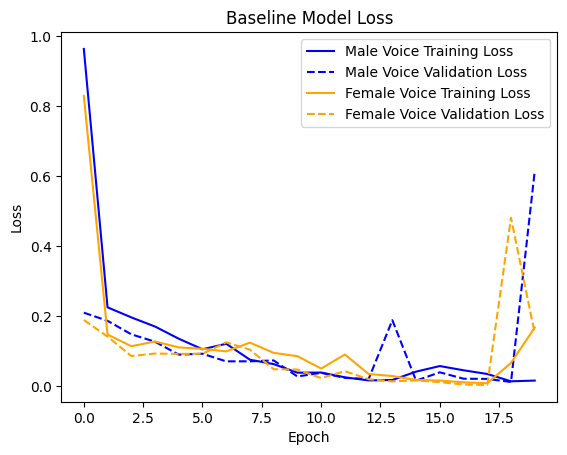

In [10]:
import matplotlib.pyplot as plt

# Assuming you have two history objects: history1 and history2
# Replace these with your actual history objects

# Plot training loss for Model 1
plt.plot(history_obama.history['loss'], label='Male Voice Training Loss', color='blue')

# Plot validation loss for Model 1
plt.plot(history_obama.history['val_loss'], label='Male Voice Validation Loss', linestyle='dashed', color='blue')

# Plot training loss for Model 2
plt.plot(history_taylor.history['loss'], label='Female Voice Training Loss', color='orange')

# Plot validation loss for Model 2
plt.plot(history_taylor.history['val_loss'], label='Female Voice Validation Loss', linestyle='dashed', color='orange')

plt.title('Baseline Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


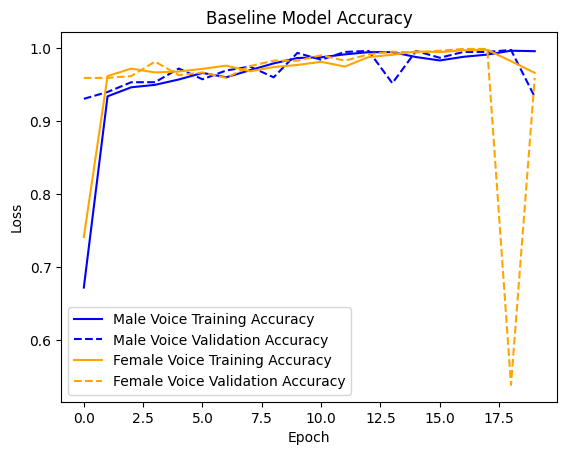

In [11]:
import matplotlib.pyplot as plt

# Assuming you have two history objects: history1 and history2
# Replace these with your actual history objects

# Plot training loss for Model 1
plt.plot(history_obama.history['accuracy'], label='Male Voice Training Accuracy', color='blue')

# Plot validation loss for Model 1
plt.plot(history_obama.history['val_accuracy'], label='Male Voice Validation Accuracy', linestyle='dashed', color='blue')

# Plot training loss for Model 2
plt.plot(history_taylor.history['accuracy'], label='Female Voice Training Accuracy', color='orange')

# Plot validation loss for Model 2
plt.plot(history_taylor.history['val_accuracy'], label='Female Voice Validation Accuracy', linestyle='dashed', color='orange')

plt.title('Baseline Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Predicting

13/13 [==============================] - 1s 72ms/step
Accuracy: 0.7010
Precision: 0.1273
Recall: 0.0933
AUC: 0.4611
F1-Score: 0.1077
AUC Score: 0.4611


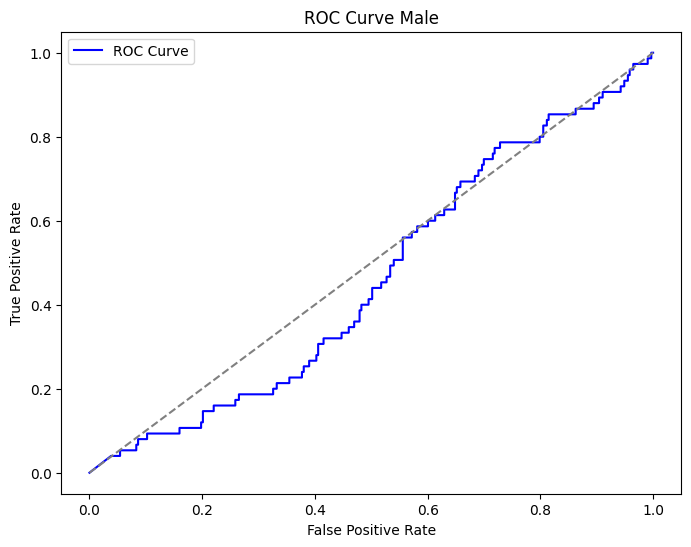

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

predicted_probs_obama = model_obama.predict(test_ds_obama)
predicted_labels_obama = (predicted_probs_obama >= 0.5).astype(int)  # Convert probabilities to binary predictions
actual_labels_obama = np.concatenate([y for x, y in test_ds_obama], axis=0)

accuracy_obama = accuracy_score(actual_labels_obama, predicted_labels_obama)
precision_obama = precision_score(actual_labels_obama, predicted_labels_obama)
recall_obama = recall_score(actual_labels_obama, predicted_labels_obama)
roc_auc_obama = roc_auc_score(actual_labels_obama, predicted_probs_obama)
f1_obama = f1_score(actual_labels_obama, predicted_labels_obama)

print(f"Accuracy: {accuracy_obama:.4f}")
print(f"Precision: {precision_obama:.4f}")
print(f"Recall: {recall_obama:.4f}")
print(f"AUC: {roc_auc_obama:.4f}")
print(f"F1-Score: {f1_obama:.4f}")

# Assuming predicted_probs contains probabilities for the positive class
fpr, tpr, thresholds = roc_curve(actual_labels_obama, predicted_probs_obama[:, 0])  # Use [:, 0] for positive class
auc_score_obama = roc_auc_score(actual_labels_obama, predicted_probs_obama[:, 0])

print(f"AUC Score: {auc_score_obama:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Male')
plt.legend()
plt.show()

16/16 [==============================] - 2s 81ms/step
Accuracy: 0.5832
Precision: 0.4493
Recall: 0.3116
AUC: 0.5340
F1-Score: 0.3680
AUC Score: 0.5340


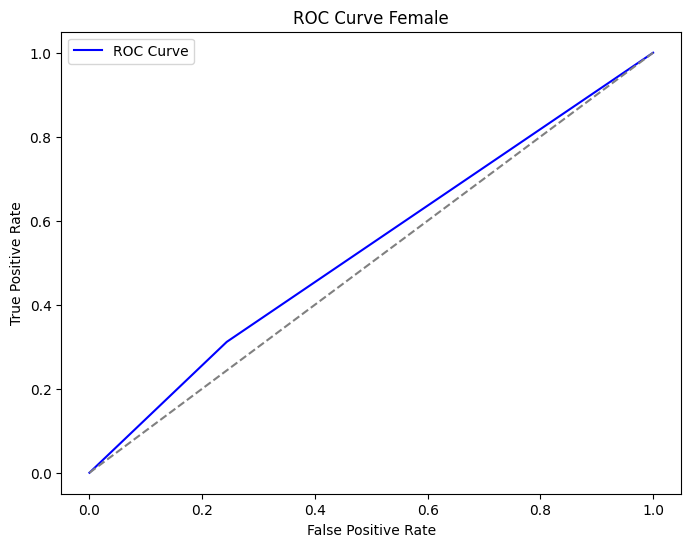

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

predicted_probs = model_taylor.predict(test_ds_taylor)
predicted_labels = (predicted_probs >= 0.5).astype(int)  # Convert probabilities to binary predictions
actual_labels = np.concatenate([y for x, y in test_ds_taylor], axis=0)

accuracy_taylor = accuracy_score(actual_labels, predicted_labels)
precision_taylor = precision_score(actual_labels, predicted_labels)
recall_taylor = recall_score(actual_labels, predicted_labels)
roc_auc_taylor = roc_auc_score(actual_labels, predicted_probs)
f1_taylor = f1_score(actual_labels, predicted_labels)

print(f"Accuracy: {accuracy_taylor:.4f}")
print(f"Precision: {precision_taylor:.4f}")
print(f"Recall: {recall_taylor:.4f}")
print(f"AUC: {roc_auc_taylor:.4f}")
print(f"F1-Score: {f1_taylor:.4f}")

# Assuming predicted_probs contains probabilities for the positive class
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probs[:, 0])  # Use [:, 0] for positive class
auc_score = roc_auc_score(actual_labels, predicted_probs[:, 0])

print(f"AUC Score: {auc_score:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Female')
plt.legend()
plt.show()

In [14]:
accuracy = (accuracy_obama+accuracy_taylor)/2
precision = (precision_obama+precision_taylor)/2
recall = (recall_obama+recall_taylor)/2
roc_auc = (roc_auc_obama+roc_auc_taylor)/2
f1 = (f1_obama+f1_taylor)/2

print(f"Accuracy: {accuracy:.4f}") 
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {roc_auc:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.6421
Precision: 0.2883
Recall: 0.2024
AUC: 0.4975
F1-Score: 0.2378
